# Histograma

In [1]:
%matplotlib inline

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt

from skimage.io import imread

def fig(w,h):
    return plt.figure(figsize=(w,h))

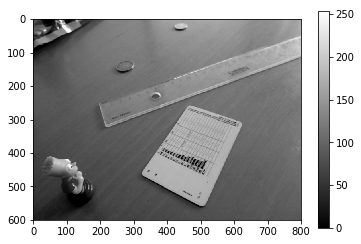

In [2]:
img = imread('../images/coins.png')
g = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

plt.imshow(g,'gray');
plt.colorbar();

In [3]:
np.histogram([0,1,2,3,0,3],np.arange(5))

(array([2, 1, 1, 2]), array([0, 1, 2, 3, 4]))

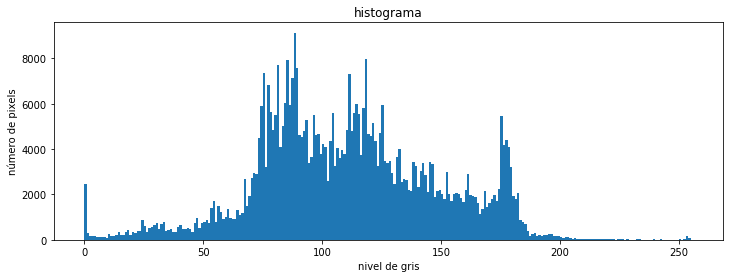

In [4]:
fig(12,4)
plt.hist(g.flatten(), np.arange(257)); plt.xlabel('nivel de gris'); plt.ylabel('número de pixels');
plt.title('histograma');

## Transformaciones de "valor"

Se modifica cada pixel independientemente de los demás.

In [5]:
img = imread('http://robot.inf.um.es/material/va/images/exposure/exposure1.jpg')
#img = imread('../images/coins.png')
#img = imread('../images/cube3.png')

In [6]:
g = cv.cvtColor(img,cv.COLOR_RGB2GRAY).astype(float)

In [7]:
def show(x):
    fig(12,4)
    plt.subplot(1,2,1)
    plt.imshow(x,'gray',vmin=0, vmax=255)
    plt.subplot(1,2,2)
    kk = plt.hist(np.clip(x,0,255).flatten(),np.arange(257)); plt.axis([-1,256,0,10000]);
    #print(kk[0])

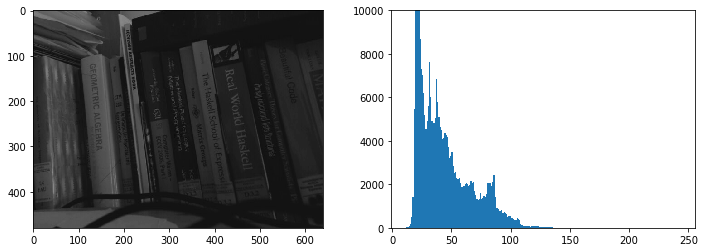

In [8]:
show(g)

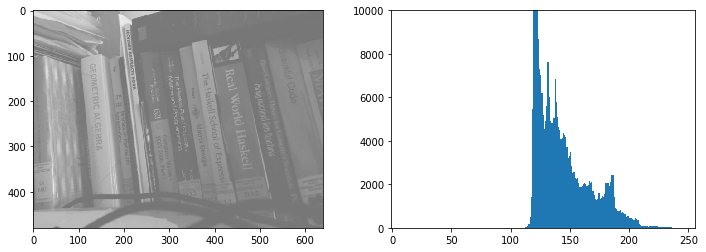

In [9]:
show(g+100)

## Histogram equalization

En el siguiente ejemplo vamos a mostrar un par de técnicas de normalización de contraste que tratan de repartir un poco mejor la gama de blanco a negro de la imagen.

In [10]:
# trabajan con pixels de tipo int
g = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

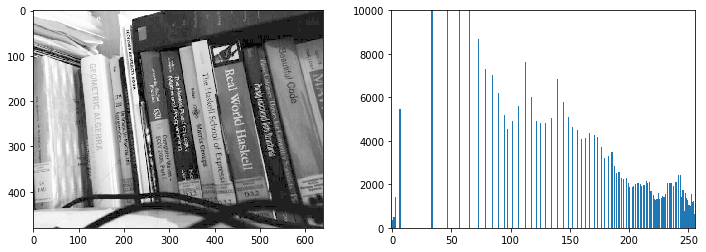

In [11]:
show(cv.equalizeHist(g))

El método [CLAHE](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization) (*contrast limited adaptive histogram equalization*) equaliza cada pixel con el histograma de su entorno local. La limitación de contraste evita la amplificación del ruido.

In [12]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

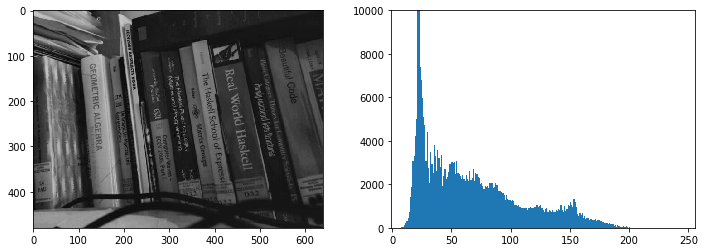

In [13]:
show(clahe.apply(g))

En imágenes en color se puede aplicar la ecualización de histograma al canal de luminancia en el espacios de color YUV, HSL, etc.

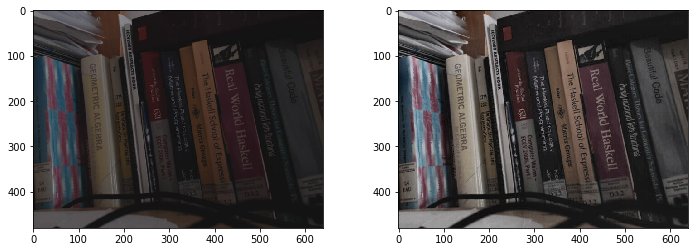

In [19]:
yuv = cv.cvtColor(img,cv.COLOR_RGB2YUV)
#yuv[:,:,0] = cv.equalizeHist(yuv[:,:,0])
yuv[:,:,0] = clahe.apply(yuv[:,:,0])
z = cv.cvtColor(yuv,cv.COLOR_YUV2RGB)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.imshow(img);
plt.subplot(1,2,2); plt.imshow(z);

## Histogram 2D

In [15]:
import numpy as np
import matplotlib.pyplot as plt

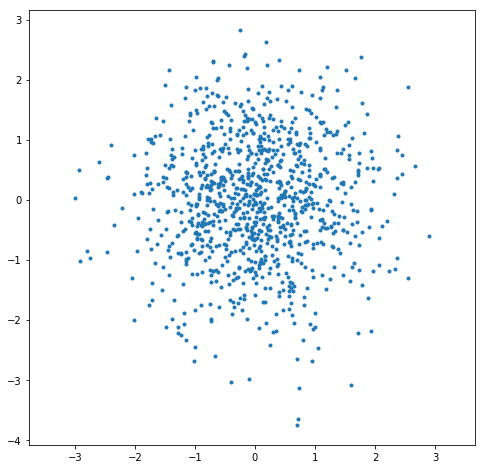

In [16]:
datos = np.random.randn(1000,2)
plt.figure(figsize=(8,8))
plt.plot(*datos.T,'.')
plt.axis('equal');

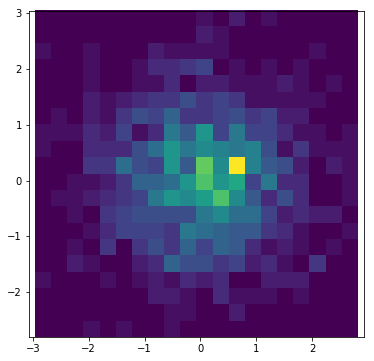

In [17]:
plt.figure(figsize=(6,6))
hist,*k = plt.hist2d(*np.random.randn(1000,2).T,bins=20)
plt.axis('equal');

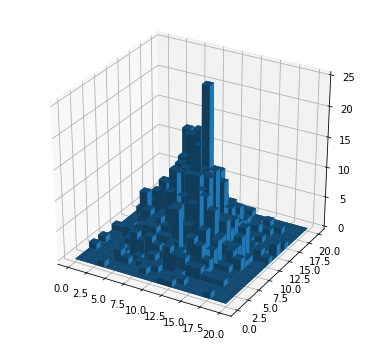

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fg = plt.figure(figsize=(14, 6))

_xx, _yy = np.meshgrid(np.arange(20), np.arange(20))
x, y = _xx.ravel(), _yy.ravel()
bottom = 0
width = depth = 1

ax1 = fg.add_subplot(121, projection='3d')
top = hist.ravel()
ax1.bar3d(x, y, bottom, width, depth, top , shade=True);